### Supervised Machine Learning:
- Labeled Dataset
- Try to model relationships and dependencies between the target prediction output and the input features 
- Adjusts its weights until it has been fitted appropriately.
- Avoids overfitting or underfitting
- Helps organizations solve a variety of real-world problems at scale, such as classifying spam in a separate folder from your inbox.
- Neural networks, linear regression, logistic regression, random forest, and support vector machine (SVM)
- Supervised learning problems can be further classified into regression and classification problems
  - Classification: In a classification problem, the output variable is a category, such as “red” or “blue,” “disease” or “no disease,” “true” or “false,” etc.
  - Regression: In a regression problem, the output variable is a real continuous value, such as “dollars” or “weight.”

#### Classification:
- Two categories : Binary Classification and Multiclass Classification
-  spark.mllib supports two linear methods for classification: linear Support Vector Machines (SVMs) and logistic regression.
- Linear SVMs supports only binary classification, while logistic regression supports both binary and multiclass classification problems.
- Logistic Regression
   - Popular method to predict a categorical response.
   - A special case of **Generalized Linear models that predicts the probability of the outcomes**.
   - In spark.ml,it is used to predict binary outcome by using binomial logistic regression
   - It can be used to predict a multiclass outcome by using multinomial logistic regression.
   - Use the family parameter to select between these two algorithms, or leave it unset and Spark will infer the correct variant.
   - Multinomial logistic regression can be used for binary classification by setting the family param to “multinomial”. It will produce two sets of coefficients and two intercepts.



#### Import dependencies

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext,SparkConf
import time,os
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.pandas as ps
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

#### Create Spark Session

In [ ]:
# Create Spark Session
conf=SparkConf()
sc=SparkContext(conf=conf)

# Stop default sc
sc.stop()
spark = SparkSession \
    .builder \
    .master("spark://Kirtis-MacBook-Pro.local:7077") \
    .appName("Spark_Machine_learning") \
    .config("spark.executor.memory",'2g') \
    .getOrCreate()


In [ ]:
spark

#### Load Dataset

In [4]:
## Verify that we are accessing the data file
data_folder = "/Users/Kirtikamerkar/Austincapitaldata/data"
data_path=data_folder+"/influenza-surveillance-jtpkmr/influenza.csv"
print(f"The file at `{data_path}` {'exists' if os.path.isfile(data_path) else 'does NOT exist! Check your path'}.")

The file at `/Users/Kirtikamerkar/Austincapitaldata/data/influenza-surveillance-jtpkmr/influenza.csv` exists.


In [ ]:
#Loading influenza data
influenza_psdf=ps.read_csv(data_path,inferSchema = True)

23/05/01 09:53:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:53:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:54:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:54:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 09:54:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:54:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:55:02 WARN StandaloneAppClient$ClientEndpoint: Connection to Kirtis-MacBook-Pro.local:7077 failed; waiting for master to reconnect...
23/05/01 09:55:02 WARN StandaloneSchedulerBackend: Disconnected from Spark cluster! Waiting for reconnection...
23/05/01 09:55:02 WARN StandaloneAppClient$ClientEndpoint: Connection to Kirtis-MacBook-Pro.local:7077 failed; waiting for master to reconnect...
23/05/01 09:55:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:55:27 WARN TaskSchedulerImpl: Initial job has not accept

23/05/01 09:55:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:55:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:56:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:56:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 09:56:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:56:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:57:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:57:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 09:57:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:57:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:58:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:58:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 09:58:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:58:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:59:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:59:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 09:59:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 09:59:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:00:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:00:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:00:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:00:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:01:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:01:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:01:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:01:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:02:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:02:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:02:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:02:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:03:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:03:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:03:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:03:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:04:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:04:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:04:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:04:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:05:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:05:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:05:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:05:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:06:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:06:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:06:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:06:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:07:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:07:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:07:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:07:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:25:28 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:25:28 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:25:28 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:25:28 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:25:28 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:25:28 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure th

23/05/01 10:25:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:25:57 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:26:12 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


23/05/01 10:26:27 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/01 10:26:42 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


#### Data Exploration

In [60]:
influenza_psdf.dtypes

season                object
date_code              int32
weekending            object
region                object
Respiratory_Virus     object
Number_Positive        int32
Specimens_Tested       int32
Percent_Positive     float64
dtype: object

In [61]:
influenza_psdf.columns

Index(['season', 'date_code', 'weekending', 'region', 'Respiratory_Virus',
       'Number_Positive', 'Specimens_Tested', 'Percent_Positive'],
      dtype='object')

In [7]:
influenza_psdf.head()

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,10/10/09,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/09,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/09,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/09,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/09,California,Influenza_A,1077,3324,32.40


In [8]:
influenza_psdf.describe()

,date_code,Number_Positive,Specimens_Tested,Percent_Positive
count,50011.000000,50011.000000,50011.000000,42414.000000
mean,201658.047570,20.653936,351.877027,3.943707
std,263.947403,91.746507,611.778964,7.121999
min,200940.000000,0.000000,0.000000,0.000000
25%,201507.000000,0.000000,40.000000,0.000000
50%,201707.000000,1.000000,133.000000,0.710000
75%,201849.000000,7.000000,400.000000,4.550000
max,202039.000000,3120.000000,8013.000000,100.000000


#### Cleaning Data:

In [62]:
#Renaming column names
influenza_psdf=influenza_psdf.rename(columns={"season": "Season", "date_code": "Date_Code",'weekending':'Weekending',"region":"Region"})
influenza_psdf.head()

,Season,Date_Code,Weekending,Region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,10/10/09,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/09,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/09,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/09,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/09,California,Influenza_A,1077,3324,32.40


#### Replacing All Nan values with zero using fillna()

In [63]:
influenza_psdf=influenza_psdf.fillna(0)

#### Removing All Rows with all columns values with zero  

In [64]:
influenza_psdf=influenza_psdf.to_pandas().loc[~(influenza_psdf.to_pandas()==0).all(axis=1)]

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [75]:
influenza_psdf.head()

,Season,Date_Code,Weekending,Region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,10/10/09,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/09,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/09,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/09,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/09,California,Influenza_A,1077,3324,32.40


In [13]:
influenza_psdf.shape

(50011, 8)

In [34]:
influenza_psdf.describe()

,Date_Code,Number_Positive,Specimens_Tested,Percent_Positive
count,50011.000000,50011.000000,50011.000000,50011.000000
mean,201658.047570,20.653936,351.877027,3.344632
std,263.947403,91.746507,611.778964,6.709792
min,200940.000000,0.000000,0.000000,0.000000
25%,201507.000000,0.000000,40.000000,0.000000
50%,201707.000000,1.000000,133.000000,0.120000
75%,201849.000000,7.000000,402.000000,3.330000
max,202039.000000,3120.000000,8013.000000,100.000000


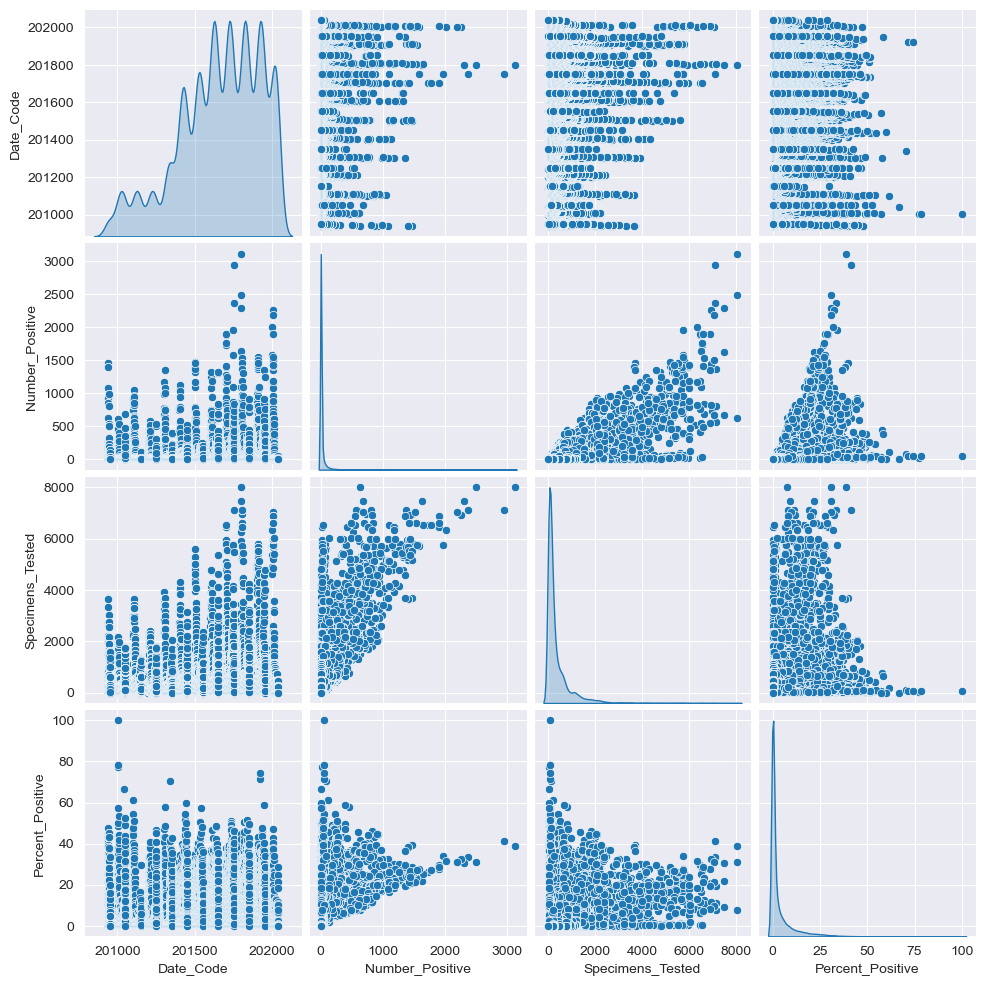

In [30]:
sns.pairplot(data=influenza_psdf, diag_kind='kde')

In [10]:
#stringindex for views
influenza_df=spark.createDataFrame(influenza_psdf)
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
respiratory_virus_indexer = StringIndexer(inputCol="Respiratory_Virus", outputCol="Respiratory_Virus_Index")
influenza_df =respiratory_virus_indexer.fit(influenza_df).transform(influenza_df)


In [11]:
influenza_df.select(["Respiratory_Virus_Index"]).show()

+-----------------------+
|Respiratory_Virus_Index|
+-----------------------+
|                    0.0|
|                    1.0|
|                    3.0|
|                    2.0|
|                    0.0|
|                    1.0|
|                    3.0|
|                    2.0|
|                    0.0|
|                    1.0|
|                    3.0|
|                    2.0|
|                    0.0|
|                    1.0|
|                    3.0|
|                    2.0|
|                    0.0|
|                    1.0|
|                    3.0|
|                    2.0|
+-----------------------+
only showing top 20 rows



#### Create vector of columns with VectorAssembler

In [12]:

feat_cols=["Date_Code","Number_Positive","Specimens_Tested","Percent_Positive"]
#feature_vector=VectorAssembler(inputCols="feat_cols",outputCol="feature")
vectorAssembler = VectorAssembler(inputCols = feat_cols, outputCol = 'features')

influenza_df = vectorAssembler.transform(influenza_df)
influenza_df.show()
# VectorAssembler is a transformer that creates a single vector column from a list of columns mentioned.

+---------+---------+----------+--------------+-----------------+---------------+----------------+----------------+-----------------------+--------------------+
|   Season|Date_Code|Weekending|        Region|Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|Respiratory_Virus_Index|            features|
+---------+---------+----------+--------------+-----------------+---------------+----------------+----------------+-----------------------+--------------------+
|2009-2010|   200940|  10/10/09|      Bay Area|      Influenza_A|             36|             220|           16.36|                    0.0|[200940.0,36.0,22...|
|2009-2010|   200940|  10/10/09|      Bay Area|      Influenza_B|              0|             220|             0.0|                    1.0|[200940.0,0.0,220...|
|2009-2010|   200940|  10/10/09|      Bay Area|  Total_Influenza|             36|             220|           16.36|                    3.0|[200940.0,36.0,22...|
|2009-2010|   200940|  10/10/09|  

In [13]:
influenza_df.select(["Respiratory_Virus","Respiratory_Virus_Index"]).groupBy("Respiratory_Virus","Respiratory_Virus_Index").count().show()

+--------------------+-----------------------+-----+
|   Respiratory_Virus|Respiratory_Virus_Index|count|
+--------------------+-----------------------+-----+
|          Adenovirus|                    4.0| 2555|
|     Parainfluenza_3|                    9.0| 2555|
|                HMPV|                    6.0| 2555|
|     Parainfluenza_4|                   10.0| 2555|
|                 RSV|                    2.0| 4024|
|Enterovirus_Rhino...|                    5.0| 2555|
|         Influenza_A|                    0.0| 4024|
|     Parainfluenza_2|                    8.0| 2555|
| Total_Parainfluenza|                   12.0| 2555|
|     Total_Influenza|                    3.0| 4024|
|         Influenza_B|                    1.0| 4024|
|     Parainfluenza_1|                    7.0| 2555|
|Parainfluenza_Unk...|                   11.0| 2555|
|    Coronavirus_NL63|                   15.0| 1820|
|   Total_Coronavirus|                   18.0| 1820|
|    Coronavirus_HKU1|                   14.0|

#### Model Data to Logistic Regression:
- Import LogisticRegression package from pyspark ml library

In [15]:
from pyspark.ml.classification import LogisticRegression

#### Splitting data between test and train
- Split the data set such that the training set has 70% of data and the testing set has 30% of the total data.

In [17]:
model_df=influenza_df.select(['Respiratory_Virus_Index','features'])
train, test = model_df.randomSplit([0.9, 0.1])

In [119]:
lr = LogisticRegression(labelCol="Respiratory_Virus_Index",predictionCol="prediction",regParam=0.1)
lrn = lr.fit(train)

In [120]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrn.coefficientMatrix))
print("Intercept: " + str(lrn.interceptVector))

Coefficients: DenseMatrix([[-1.11270185e-03,  1.63519950e-03,  1.26974226e-04,
               1.19832155e-02],
             [-1.11737603e-03,  1.24263498e-04,  2.36404011e-04,
              -1.13610398e-02],
             [-1.08883319e-03,  9.97646983e-04,  7.48721026e-05,
               2.94794421e-02],
             [-1.07978548e-03,  2.07123178e-03,  5.61195273e-05,
               2.85341813e-02],
             [ 1.43246484e-04, -3.44222899e-04, -4.33688663e-06,
               2.15125003e-03],
             [ 2.15318460e-04,  4.19996064e-04, -7.85714773e-05,
               8.41767310e-02],
             [ 1.42692489e-04, -1.91045477e-04, -1.23169163e-05,
              -2.72807557e-03],
             [ 1.29892964e-04, -4.62027459e-04,  7.93494025e-07,
              -1.37671608e-02],
             [ 1.33976359e-04, -5.40692649e-04,  3.68230052e-06,
              -1.90218634e-02],
             [ 1.32024343e-04, -4.01322566e-04, -1.06475941e-06,
              -4.50133668e-03],
             [ 1

In [121]:
lrn.getElasticNetParam() 

0.0

In [122]:
print(lrn.extractParamMap())

{Param(parent='LogisticRegression_d482eed050f4', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_d482eed050f4', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_d482eed050f4', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_d482eed050f4', name='featuresCol', doc='features column name.'): 'features', Param(parent='LogisticRegression_d482eed050f4', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_d482eed050f4', name='labelCol', doc='label column name.'): 'Respiratory_Virus_Index', Param(parent='LogisticRegression_d482eed050f4', name='maxBlockSizeInMB', doc='maximum memory

In [123]:
train_result=lrn.evaluate(train)

In [124]:
train_result.accuracy

0.12366117061463935

In [125]:
train_result.predictions.show()

+-----------------------+------------------+--------------------+--------------------+----------+
|Respiratory_Virus_Index|          features|       rawPrediction|         probability|prediction|
+-----------------------+------------------+--------------------+--------------------+----------+
|                    0.0|(4,[0],[200940.0])|[1.14732044100861...|[0.13140355237355...|       1.0|
|                    0.0|(4,[0],[200941.0])|[1.14620773915578...|[0.13131654787887...|       1.0|
|                    0.0|(4,[0],[200941.0])|[1.14620773915578...|[0.13131654787887...|       1.0|
|                    0.0|(4,[0],[200942.0])|[1.14509503730295...|[0.13122953974454...|       1.0|
|                    0.0|(4,[0],[200942.0])|[1.14509503730295...|[0.13122953974454...|       1.0|
|                    0.0|(4,[0],[200943.0])|[1.14398233545011...|[0.13114252804755...|       1.0|
|                    0.0|(4,[0],[200943.0])|[1.14398233545011...|[0.13114252804755...|       1.0|
|                   

In [126]:
train_result.weightedFMeasure()

0.07058534531301267

In [127]:
train_result.weightedPrecision

0.07565660962447507

In [128]:
train_result.weightedTruePositiveRate

0.12366117061463934

In [129]:
lrn_summary = lrn.summary
lrn_summary.predictions.show()

+-----------------------+------------------+--------------------+--------------------+----------+
|Respiratory_Virus_Index|          features|       rawPrediction|         probability|prediction|
+-----------------------+------------------+--------------------+--------------------+----------+
|                    0.0|(4,[0],[200940.0])|[1.14732044100861...|[0.13140355237355...|       1.0|
|                    0.0|(4,[0],[200941.0])|[1.14620773915578...|[0.13131654787887...|       1.0|
|                    0.0|(4,[0],[200941.0])|[1.14620773915578...|[0.13131654787887...|       1.0|
|                    0.0|(4,[0],[200942.0])|[1.14509503730295...|[0.13122953974454...|       1.0|
|                    0.0|(4,[0],[200942.0])|[1.14509503730295...|[0.13122953974454...|       1.0|
|                    0.0|(4,[0],[200943.0])|[1.14398233545011...|[0.13114252804755...|       1.0|
|                    0.0|(4,[0],[200943.0])|[1.14398233545011...|[0.13114252804755...|       1.0|
|                   

In [130]:
test_result=lrn.evaluate(test)

In [131]:
test_result.predictions.show()

+-----------------------+--------------------+--------------------+--------------------+----------+
|Respiratory_Virus_Index|            features|       rawPrediction|         probability|prediction|
+-----------------------+--------------------+--------------------+--------------------+----------+
|                    0.0|  (4,[0],[200948.0])|[1.13841882618595...|[0.13070741882007...|       1.0|
|                    0.0|  (4,[0],[200951.0])|[1.13508072062745...|[0.13044631546541...|       1.0|
|                    0.0|  (4,[0],[201019.0])|[1.05941699463494...|[0.12452509765076...|       1.0|
|                    0.0|  (4,[0],[201019.0])|[1.05941699463494...|[0.12452509765076...|       1.0|
|                    0.0|  (4,[0],[201021.0])|[1.05719159092927...|[0.12435099297014...|       1.0|
|                    0.0|  (4,[0],[201023.0])|[1.05496618722361...|[0.12417689853572...|       1.0|
|                    0.0|  (4,[0],[201025.0])|[1.05274078351794...|[0.12400281496926...|       1.0|


#### Confusion Matrix for multiclass logistic regression:

In [132]:
from sklearn.metrics import confusion_matrix
y_true = test_result.predictions.select("Respiratory_Virus_Index")
y_true = y_true.toPandas()

y_pred = test_result.predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(19))
cnf_matrix

array([[  2, 260,  57,  37,   0,  36,   0,   0,   0,   0,   0,  10,   0,
          0,   0,   0,   0,   0,   0],
       [ 10, 319,  33,  17,   0,   6,   0,   0,   0,   0,   0,  28,   0,
          0,   0,   0,   0,   0,   0],
       [ 13, 197,  79,  59,   0,  34,   0,   0,   0,   0,   0,  24,   2,
          0,   0,   0,   0,   0,   0],
       [  4, 213,  86,  46,   0,  45,   0,   0,   0,   0,   0,  26,   1,
          0,   0,   0,   0,   0,   0],
       [  1, 144,  86,   0,   0,  13,   0,   0,   0,   0,   0,  20,   5,
          0,   0,   0,   0,   0,   0],
       [  1,  30,  32,  31,   0, 144,   0,   0,   0,   0,   0,  10,  10,
          0,   0,   0,   0,   0,   0],
       [  6, 155,  41,   6,   0,  11,   0,   0,   0,   0,   0,  25,   0,
          0,   0,   0,   0,   0,   0],
       [  0, 191,  17,   0,   0,   6,   0,   0,   0,   0,   0,  42,   0,
          0,   0,   0,   0,   0,   0],
       [  1, 182,  19,   0,   0,   0,   0,   0,   0,   0,   0,  43,   0,
          0,   0,   0,   0,   0

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.GnBu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

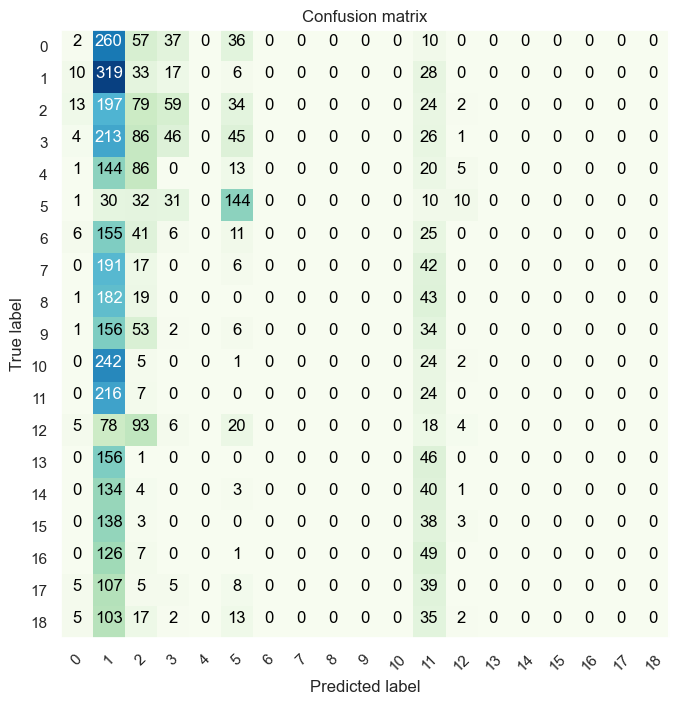

In [134]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(19))

In [135]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(19)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.04      0.00      0.01       402
     Class 1       0.10      0.77      0.18       413
     Class 2       0.12      0.19      0.15       408
     Class 3       0.22      0.11      0.15       421
     Class 4       0.00      0.00      0.00       269
     Class 5       0.41      0.56      0.48       258
     Class 6       0.00      0.00      0.00       244
     Class 7       0.00      0.00      0.00       256
     Class 8       0.00      0.00      0.00       245
     Class 9       0.00      0.00      0.00       252
    Class 10       0.00      0.00      0.00       274
    Class 11       0.04      0.10      0.06       247
    Class 12       0.13      0.02      0.03       224
    Class 13       0.00      0.00      0.00       203
    Class 14       0.00      0.00      0.00       182
    Class 15       0.00      0.00      0.00       182
    Class 16       0.00      0.00      0.00       183
    Class 17       0.00    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
test_result.predictions.select("Respiratory_Virus_Index","prediction").show(100)

+-----------------------+----------+
|Respiratory_Virus_Index|prediction|
+-----------------------+----------+
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       1.0|
|                    0.0|       2.0|
|                    0.0|       5.0|
|                    0.0|       3.0|
|                    0.0|       3.0|
|                    0.0|       3.0|
|                    0.0|       3.0|
|                    0.0|       3.0|
|                    0.0|       3.0|
|                    0.0|       2.0|
|                    0.0|       2.0|
|                    0.0|       1.0|
|

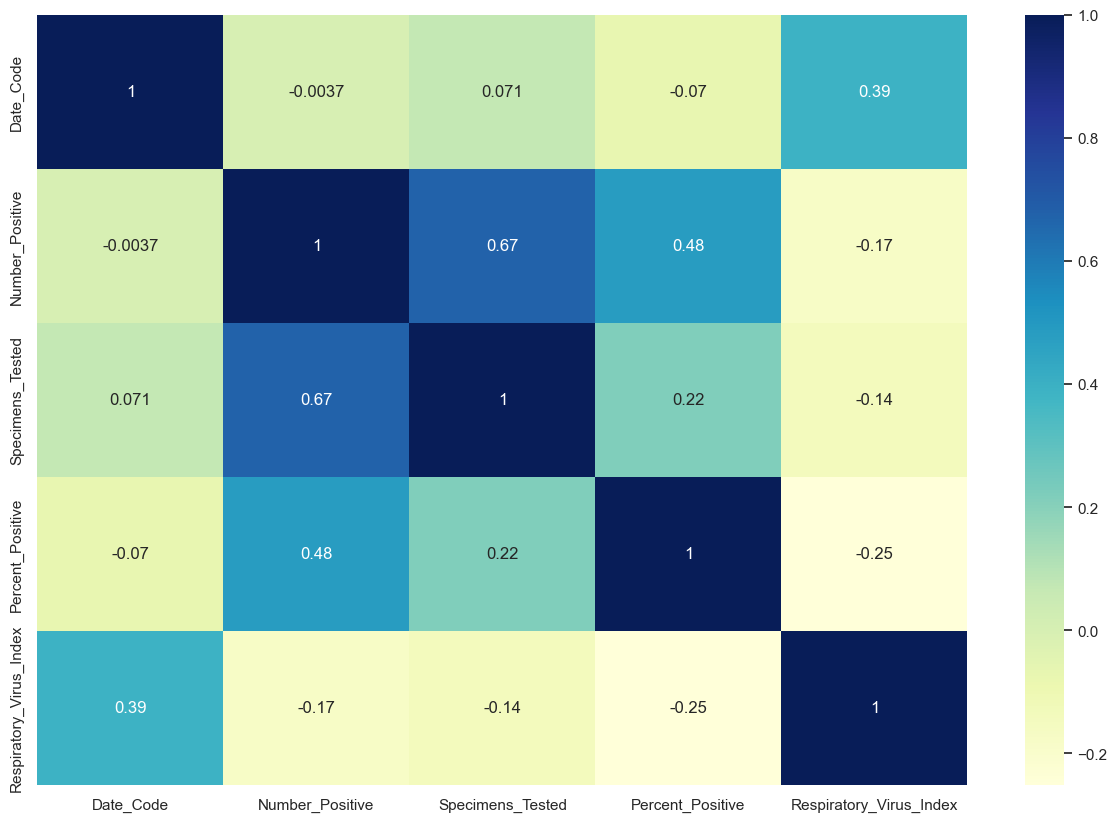

In [137]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(influenza_df.toPandas().iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [138]:
lrn = lr.fit(test)

In [141]:
lrn_summary = lrn.summary
lrn_summary.predictions.show()

+-----------------------+--------------------+--------------------+--------------------+----------+
|Respiratory_Virus_Index|            features|       rawPrediction|         probability|prediction|
+-----------------------+--------------------+--------------------+--------------------+----------+
|                    0.0|  (4,[0],[200948.0])|[1.06486174370317...|[0.12100830182530...|       1.0|
|                    0.0|  (4,[0],[200951.0])|[1.06184814612916...|[0.12080405318427...|       1.0|
|                    0.0|  (4,[0],[201019.0])|[0.99353993445177...|[0.11613917027683...|       1.0|
|                    0.0|  (4,[0],[201019.0])|[0.99353993445177...|[0.11613917027683...|       1.0|
|                    0.0|  (4,[0],[201021.0])|[0.99153086940245...|[0.11600105838132...|       1.0|
|                    0.0|  (4,[0],[201023.0])|[0.98952180435310...|[0.11586290091774...|       1.0|
|                    0.0|  (4,[0],[201025.0])|[0.98751273930378...|[0.11572469842338...|       1.0|


In [140]:
lrn_summary.predictions.filter("Respiratory_Virus_Index ==1").show()

+-----------------------+------------------+--------------------+--------------------+----------+
|Respiratory_Virus_Index|          features|       rawPrediction|         probability|prediction|
+-----------------------+------------------+--------------------+--------------------+----------+
|                    1.0|(4,[0],[200940.0])|[1.07289800390051...|[0.12155224659959...|       1.0|
|                    1.0|(4,[0],[200944.0])|[1.06887987380184...|[0.12128040601526...|       1.0|
|                    1.0|(4,[0],[200950.0])|[1.06285267865382...|[0.12087215217289...|       1.0|
|                    1.0|(4,[0],[201018.0])|[0.99454446697646...|[0.11620820896875...|       1.0|
|                    1.0|(4,[0],[201029.0])|[0.98349460920510...|[0.11544816049333...|       1.0|
|                    1.0|(4,[0],[201029.0])|[0.98349460920510...|[0.11544816049333...|       1.0|
|                    1.0|(4,[0],[201031.0])|[0.98148554415578...|[0.11530982613403...|       1.0|
|                   

In [146]:
lrn_summary.predictions.filter("Respiratory_Virus_Index ==2").filter("prediction==2").show()

+-----------------------+--------------------+--------------------+--------------------+----------+
|Respiratory_Virus_Index|            features|       rawPrediction|         probability|prediction|
+-----------------------+--------------------+--------------------+--------------------+----------+
|                    2.0|[201309.0,308.0,2...|[1.67082745033530...|[0.16953352282486...|       2.0|
|                    2.0|[201351.0,94.0,14...|[1.06733249075324...|[0.12346941373736...|       2.0|
|                    2.0|[201352.0,137.0,1...|[1.19079859396762...|[0.13320395680508...|       2.0|
|                    2.0|[201405.0,324.0,2...|[1.61980529176750...|[0.16760186894509...|       2.0|
|                    2.0|[201406.0,331.0,2...|[1.63246729183038...|[0.16836722718927...|       2.0|
|                    2.0|[201503.0,735.0,4...|[2.47434240712192...|[0.22981082517387...|       2.0|
|                    2.0|[201505.0,776.0,4...|[2.55191862282660...|[0.23300231101515...|       2.0|


In [142]:
lrn_summary.predictions.groupBy("Respiratory_Virus_Index","prediction").count().show()

+-----------------------+----------+-----+
|Respiratory_Virus_Index|prediction|count|
+-----------------------+----------+-----+
|                    8.0|       3.0|   19|
|                   10.0|       1.0|  238|
|                    7.0|       3.0|   14|
|                    6.0|       1.0|  152|
|                    3.0|       5.0|   40|
|                    0.0|       5.0|   28|
|                   11.0|       1.0|  213|
|                   11.0|       3.0|    7|
|                    5.0|       1.0|   30|
|                    5.0|       2.0|    9|
|                    6.0|       3.0|   41|
|                    1.0|       1.0|  316|
|                    7.0|       1.0|  190|
|                   12.0|       1.0|   80|
|                    0.0|       1.0|  259|
|                    2.0|       2.0|   39|
|                    3.0|       1.0|  213|
|                    5.0|       3.0|   67|
|                    9.0|       1.0|  156|
|                    2.0|       3.0|  118|
+----------

In [ ]:
TN = test_result.prediction.filter('prediction = 0 AND Respiratory_Virus_Index= prediction').count()
TP = test_result.prediction.filter('prediction = 1 AND Respiratory_Virus_Index = prediction').count()
FN = test_result.prediction.filter('prediction = 0 AND Respiratory_Virus_Index <> prediction').count()
FP = test_result.prediction.filter('prediction = 1 AND Respiratory_Virus_Index<> prediction').count()

In [93]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
wordsData = tokenizer.transform(sentenceData)

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("label", "features").show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(20,[6,8,13,16],[...|
|  0.0|(20,[0,2,7,13,15,...|
|  1.0|(20,[3,4,6,11,19]...|
+-----+--------------------+



In [94]:
sentenceData.show()

+-----+--------------------+
|label|            sentence|
+-----+--------------------+
|  0.0|Hi I heard about ...|
|  0.0|I wish Java could...|
|  1.0|Logistic regressi...|
+-----+--------------------+



In [95]:
wordsData.show()

+-----+--------------------+--------------------+
|label|            sentence|               words|
+-----+--------------------+--------------------+
|  0.0|Hi I heard about ...|[hi, i, heard, ab...|
|  0.0|I wish Java could...|[i, wish, java, c...|
|  1.0|Logistic regressi...|[logistic, regres...|
+-----+--------------------+--------------------+



In [34]:
influenza_df.groupBy("Respiratory_Virus").count().show(truncate=False)

+-------------------------+-----+
|Respiratory_Virus        |count|
+-------------------------+-----+
|Parainfluenza_3          |2555 |
|Parainfluenza_UnknownType|2555 |
|Total_Parainfluenza      |2555 |
|Total_Influenza          |4024 |
|Enterovirus_Rhinovirus   |2555 |
|Influenza_B              |4024 |
|Influenza_A              |4024 |
|Parainfluenza_1          |2555 |
|Parainfluenza_2          |2555 |
|Adenovirus               |2555 |
|HMPV                     |2555 |
|Parainfluenza_4          |2555 |
|RSV                      |4024 |
|Coronavirus_229E         |1820 |
|Coronavirus_NL63         |1820 |
|Total_Coronavirus        |1820 |
|Coronavirus_HKU1         |1820 |
|Coronavirus_UnknownType  |1820 |
|Coronavirus_OC43         |1820 |
+-------------------------+-----+



#### Logistic Regression Model for  Binomial :
-  In spark.ml logistic regression can be used to predict a binary outcome by using binomial logistic regression
- Binary logistic regression can be generalized into multinomial logistic regression to train and predict multiclass classification problems.

In [65]:
influenza_df=spark.createDataFrame(influenza_psdf)

In [66]:
listedViruses=["Parainfluenza_3","Parainfluenza_UnknownType","Total_Parainfluenza","Enterovirus_Rhinovirus","Influenza_B","Influenza_A","Parainfluenza_1","Parainfluenza_2","Parainfluenza_4","RSV"]  
influenza_df=influenza_df.withColumn("Flu",when(influenza_df["Respiratory_Virus"].isin(listedViruses),lit("Yes")).otherwise(lit("No")))
influenza_df.select('Respiratory_Virus',"Flu").groupBy("Flu").count().show()

+---+-----+
|Flu|count|
+---+-----+
| No|20054|
|Yes|29957|
+---+-----+



In [67]:
influenza_df.printSchema()

root
 |-- Season: string (nullable = true)
 |-- Date_Code: long (nullable = true)
 |-- Weekending: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Respiratory_Virus: string (nullable = true)
 |-- Number_Positive: long (nullable = true)
 |-- Specimens_Tested: long (nullable = true)
 |-- Percent_Positive: double (nullable = true)
 |-- Flu: string (nullable = false)



In [68]:
#Convert string to string index
from pyspark.ml.feature import StringIndexer
flu_indexer = StringIndexer(inputCol="Flu", outputCol="Flu_Index")
influenza_df =flu_indexer.fit(influenza_df).transform(influenza_df)


In [69]:
influenza_df.select("Flu","Flu_index").show()

+---+---------+
|Flu|Flu_index|
+---+---------+
|Yes|      0.0|
|Yes|      0.0|
| No|      1.0|
|Yes|      0.0|
|Yes|      0.0|
|Yes|      0.0|
| No|      1.0|
|Yes|      0.0|
|Yes|      0.0|
|Yes|      0.0|
| No|      1.0|
|Yes|      0.0|
|Yes|      0.0|
|Yes|      0.0|
| No|      1.0|
|Yes|      0.0|
|Yes|      0.0|
|Yes|      0.0|
| No|      1.0|
|Yes|      0.0|
+---+---------+
only showing top 20 rows



In [70]:
feat_cols=["Date_Code","Number_Positive","Specimens_Tested","Percent_Positive"]
#feature_vector=VectorAssembler(inputCols="feat_cols",outputCol="feature")
vectorAssembler = VectorAssembler(inputCols = feat_cols, outputCol = 'features')

vectorDf= vectorAssembler.transform(influenza_df)
vectorDf.show()
# VectorAssembler is a transformer that creates a single vector column from a list of columns mentioned.

+---------+---------+----------+--------------+-----------------+---------------+----------------+----------------+---+---------+--------------------+
|   Season|Date_Code|Weekending|        Region|Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|Flu|Flu_Index|            features|
+---------+---------+----------+--------------+-----------------+---------------+----------------+----------------+---+---------+--------------------+
|2009-2010|   200940|  10/10/09|      Bay Area|      Influenza_A|             36|             220|           16.36|Yes|      0.0|[200940.0,36.0,22...|
|2009-2010|   200940|  10/10/09|      Bay Area|      Influenza_B|              0|             220|             0.0|Yes|      0.0|[200940.0,0.0,220...|
|2009-2010|   200940|  10/10/09|      Bay Area|  Total_Influenza|             36|             220|           16.36| No|      1.0|[200940.0,36.0,22...|
|2009-2010|   200940|  10/10/09|      Bay Area|              RSV|              0|             

In [71]:
model_df=vectorDf.select(['Flu_Index','features'])
train, test = model_df.randomSplit([0.9, 0.1])

In [72]:
lrb = LogisticRegression(labelCol="Flu_Index",predictionCol="prediction",regParam=0.1)
lrnb = lrb.fit(train)

In [73]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrnb.coefficientMatrix))
print("Intercept: " + str(lrnb.interceptVector))

Coefficients: DenseMatrix([[ 0.00098884,  0.00086883, -0.00018481, -0.0235398 ]])

Intercept: [-199.69275514341115]


In [74]:
train_resultb=lrnb.evaluate(train)

In [75]:
train_resultb.predictions.show()

+---------+------------------+--------------------+--------------------+----------+
|Flu_Index|          features|       rawPrediction|         probability|prediction|
+---------+------------------+--------------------+--------------------+----------+
|      0.0|(4,[0],[200940.0])|[0.99515414362213...|[0.73010475933660...|       0.0|
|      0.0|(4,[0],[200940.0])|[0.99515414362213...|[0.73010475933660...|       0.0|
|      0.0|(4,[0],[200940.0])|[0.99515414362213...|[0.73010475933660...|       0.0|
|      0.0|(4,[0],[200941.0])|[0.99416530316727...|[0.72990986221492...|       0.0|
|      0.0|(4,[0],[200941.0])|[0.99416530316727...|[0.72990986221492...|       0.0|
|      0.0|(4,[0],[200941.0])|[0.99416530316727...|[0.72990986221492...|       0.0|
|      0.0|(4,[0],[200941.0])|[0.99416530316727...|[0.72990986221492...|       0.0|
|      0.0|(4,[0],[200941.0])|[0.99416530316727...|[0.72990986221492...|       0.0|
|      0.0|(4,[0],[200942.0])|[0.99317646271239...|[0.72971487645564...|    

In [76]:
train_resultb.predictions.groupBy("Flu_index","prediction").count().show()

+---------+----------+-----+
|Flu_index|prediction|count|
+---------+----------+-----+
|      1.0|       0.0|16477|
|      0.0|       0.0|25405|
|      1.0|       1.0| 1612|
|      0.0|       1.0| 1578|
+---------+----------+-----+



In [77]:
test_resultb=lrnb.evaluate(test)

In [78]:
from sklearn.metrics import confusion_matrix
y_true = test_resultb.predictions.select("Flu_Index")
y_true = y_true.toPandas()

y_pred = test_resultb.predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(2))
cnf_matrix

array([[2816,  158],
       [1787,  178]])

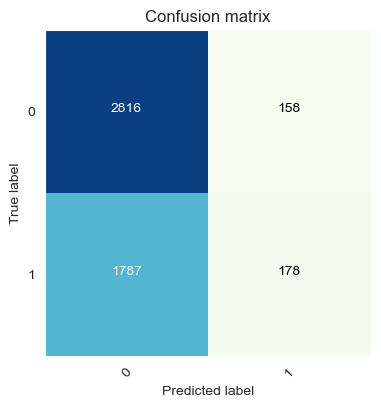

In [79]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(2))

In [80]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.61      0.95      0.74      2974
     Class 1       0.53      0.09      0.15      1965

    accuracy                           0.61      4939
   macro avg       0.57      0.52      0.45      4939
weighted avg       0.58      0.61      0.51      4939



In [81]:
test_resultb.accuracy

0.6061955861510427

In [82]:
test_resultb.precisionByLabel

[0.6117749293938736, 0.5297619047619048]

In [83]:
test_resultb.recallByLabel

[0.9468728984532616, 0.0905852417302799]

In [91]:
lrb.getRegParam()

0.1

In [92]:
lrb1= LogisticRegression(labelCol="Flu_Index",predictionCol="prediction",regParam=0.01,maxIter=100)
lrnb1 = lrb1.fit(train)

In [93]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrnb1.coefficientMatrix))
print("Intercept: " + str(lrnb1.interceptVector))

Coefficients: DenseMatrix([[ 0.00140743,  0.00288338, -0.00041965, -0.04202491]])

Intercept: [-284.0155993080712]


In [97]:
train_resultb1=lrnb1.evaluate(train)

In [98]:
train_resultb1.predictions.show()

+---------+------------------+--------------------+--------------------+----------+
|Flu_Index|          features|       rawPrediction|         probability|prediction|
+---------+------------------+--------------------+--------------------+----------+
|      0.0|(4,[0],[200940.0])|[1.20687318063943...|[0.76974522684594...|       0.0|
|      0.0|(4,[0],[200940.0])|[1.20687318063943...|[0.76974522684594...|       0.0|
|      0.0|(4,[0],[200940.0])|[1.20687318063943...|[0.76974522684594...|       0.0|
|      0.0|(4,[0],[200941.0])|[1.20546575192372...|[0.76949568298379...|       0.0|
|      0.0|(4,[0],[200941.0])|[1.20546575192372...|[0.76949568298379...|       0.0|
|      0.0|(4,[0],[200941.0])|[1.20546575192372...|[0.76949568298379...|       0.0|
|      0.0|(4,[0],[200941.0])|[1.20546575192372...|[0.76949568298379...|       0.0|
|      0.0|(4,[0],[200941.0])|[1.20546575192372...|[0.76949568298379...|       0.0|
|      0.0|(4,[0],[200942.0])|[1.20405832320807...|[0.76924594974789...|    

In [99]:
train_resultb.predictions.groupBy("Flu_index","prediction").count().show()

+---------+----------+-----+
|Flu_index|prediction|count|
+---------+----------+-----+
|      1.0|       0.0|16477|
|      0.0|       0.0|25405|
|      1.0|       1.0| 1612|
|      0.0|       1.0| 1578|
+---------+----------+-----+



In [100]:
test_resultb1=lrnb1.evaluate(test)

In [101]:
y_true = test_resultb1.predictions.select("Flu_Index")
y_true = y_true.toPandas()

y_pred = test_resultb1.predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(2))
cnf_matrix

array([[2536,  438],
       [1435,  530]])

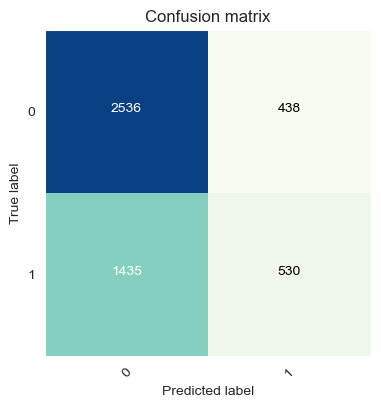

In [102]:
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(2))